In [68]:
import sys
sys.path.append("../")
import PatternStructure as ps
import AssociativeNetwork as nt
import functions as fs
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from tqdm import tqdm
sns.set(style='white',font_scale=1.5)

In [71]:
# PARAMETERS
GAMMA = 0.5
XI = 0.1
N_CELLS = 1000
N_PATTERNS = [2,3,4,5,6,7,8,9,10]
CELLS_PER_PATTERN = 250
N_CHAINS = 0 # M
PATTERNS_PER_CHAIN = 0 # Q
N_RUNS = 20 # of runs for the number of patterns
N_STEPS = 200 
DYNAMIC_SPARISTY = .3*(CELLS_PER_PATTERN/N_CELLS)


In [72]:
def simulate_random():

    CO = []
    RQ = []
    MO = []


    for NP in N_PATTERNS:
        print(f'Computing N_PATTERNS={NP} ...')

        co = []
        rq = []
        mo = []

        #Memory structure
        kernel = ps.InteractionKernel(gamma=GAMMA,xi=XI)
        memories = ps.PatternStructure(n_cells=N_CELLS,
                                    n_patterns=NP,
                                    cells_per_pattern=CELLS_PER_PATTERN,
                                    n_chains=N_CHAINS,
                                    patterns_per_chain=PATTERNS_PER_CHAIN,
                                    periodic_chains=True,
                                    kernel=kernel)


        memories.generate_patterns()
        memories.generate_chains()
        memories.build_interactions()

        for i in tqdm(range(N_RUNS)):

            net = nt.Network(J=memories.interaction_matrix, 
                        transfer_func=nt.ReLu,
                        dynamic_func=nt.net_dynamics)

            initial_config = np.random.uniform(size=N_CELLS)
            initial_config = initial_config/np.mean(initial_config)
            net.run_dynamics(initial_config,n_steps=N_STEPS,sparsity=DYNAMIC_SPARISTY)

            coherence = fs.coherence_timecourse(memories,net.history)
            retrieval_quality = fs.compute_retrieval_quality(coherence)
            max_steady_overlap = np.max(np.mean(coherence[:,N_STEPS//10:],axis=-1))

            co.append(coherence)
            rq.append(retrieval_quality)
            mo.append(max_steady_overlap)

        CO.append(np.asarray(co))
        RQ.append(np.asarray(rq))
        MO.append(np.asarray(mo))
    
    return CO,RQ,MO


def simulate_correlated():

    CO = []
    RQ = []
    MO = []


    for NP in N_PATTERNS:
        print(f'Computing N_PATTERNS={NP} ...')

        co = []
        rq = []
        mo = []

        #Memory structure
        kernel = ps.InteractionKernel(gamma=GAMMA,xi=XI)
        memories = ps.PatternStructure(n_cells=N_CELLS,
                                    n_patterns=NP,
                                    cells_per_pattern=CELLS_PER_PATTERN,
                                    n_chains=N_CHAINS,
                                    patterns_per_chain=PATTERNS_PER_CHAIN,
                                    periodic_chains=True,
                                    kernel=kernel)


        memories.generate_patterns()
        memories.generate_chains()
        memories.build_interactions()

        for i in tqdm(range(N_RUNS)):

            net = nt.Network(J=memories.interaction_matrix, 
                        transfer_func=nt.ReLu,
                        dynamic_func=nt.net_dynamics)

            initial_config = ps.build_correlated_activity(memories,0,position=0.1)
            initial_config = initial_config/np.mean(initial_config)
            net.run_dynamics(initial_config,n_steps=N_STEPS,sparsity=DYNAMIC_SPARISTY)

            coherence = fs.coherence_timecourse(memories,net.history)
            retrieval_quality = fs.compute_retrieval_quality(coherence)
            max_steady_overlap = np.max(np.mean(coherence[:,N_STEPS//10:],axis=-1))

            co.append(coherence)
            rq.append(retrieval_quality)
            mo.append(max_steady_overlap)

        CO.append(np.asarray(co))
        RQ.append(np.asarray(rq))
        MO.append(np.asarray(mo))
    
    return CO,RQ,MO



    

In [73]:
print('Computing random ...')
rand_results = simulate_random()
print('Computing correlated ...')
corr_results = simulate_correlated()


Computing random ...
Computing N_PATTERNS=2 ...


100%|██████████| 20/20 [00:05<00:00,  3.51it/s]


Computing N_PATTERNS=3 ...


100%|██████████| 20/20 [00:06<00:00,  3.08it/s]


Computing N_PATTERNS=4 ...


100%|██████████| 20/20 [00:07<00:00,  2.66it/s]


Computing N_PATTERNS=5 ...


100%|██████████| 20/20 [00:07<00:00,  2.51it/s]


Computing N_PATTERNS=6 ...


100%|██████████| 20/20 [00:09<00:00,  2.15it/s]


Computing N_PATTERNS=7 ...


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


Computing N_PATTERNS=8 ...


100%|██████████| 20/20 [00:12<00:00,  1.66it/s]


Computing N_PATTERNS=9 ...


100%|██████████| 20/20 [00:12<00:00,  1.61it/s]


Computing N_PATTERNS=10 ...


100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


Computing correlated ...
Computing N_PATTERNS=2 ...


100%|██████████| 20/20 [00:05<00:00,  3.67it/s]


Computing N_PATTERNS=3 ...


100%|██████████| 20/20 [00:06<00:00,  3.07it/s]


Computing N_PATTERNS=4 ...


100%|██████████| 20/20 [00:08<00:00,  2.50it/s]


Computing N_PATTERNS=5 ...


100%|██████████| 20/20 [00:08<00:00,  2.28it/s]


Computing N_PATTERNS=6 ...


100%|██████████| 20/20 [00:10<00:00,  1.99it/s]


Computing N_PATTERNS=7 ...


100%|██████████| 20/20 [00:10<00:00,  1.82it/s]


Computing N_PATTERNS=8 ...


100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


Computing N_PATTERNS=9 ...


100%|██████████| 20/20 [00:12<00:00,  1.61it/s]


Computing N_PATTERNS=10 ...


100%|██████████| 20/20 [00:13<00:00,  1.43it/s]


In [75]:
retrieval_th = 1

def compute_curves(results):
    MO = results[-1]

    ret_prob = []
    mean_ov = []
    std_ov = []

    for mo in MO:
        ret_prob.append(np.sum(mo>retrieval_th)/len(mo))
        mean_ov.append(np.mean(mo))
        std_ov.append(np.std(mo))

    ret_prob = np.asarray(ret_prob)
    mean_ov = np.asarray(mean_ov)
    std_ov = np.asarray(std_ov)
    
    return ret_prob,mean_ov,std_ov


rp_rand,mo_rand,std_rand = compute_curves(rand_results)
rp_corr,mo_corr,std_corr = compute_curves(corr_results)

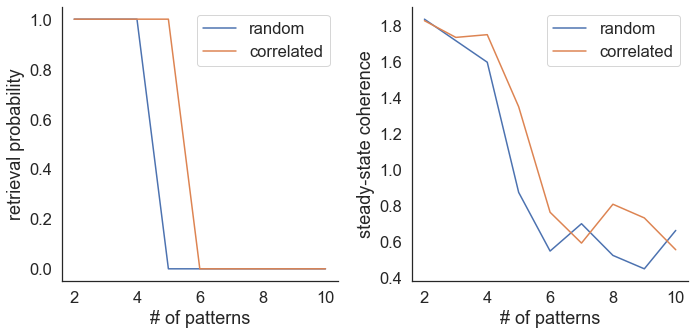

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(N_PATTERNS,rp_rand,label='random')
plt.plot(N_PATTERNS,rp_corr,label='correlated')
plt.xlabel('# of patterns')
plt.ylabel('retrieval probability')
plt.legend()
sns.despine()
plt.subplot(1,2,2)
plt.plot(N_PATTERNS,mo_rand,label='random')
plt.plot(N_PATTERNS,mo_corr,label='correlated')
plt.xlabel('# of patterns')
plt.ylabel('steady-state coherence')
plt.legend()
sns.despine()
plt.tight_layout()
#plt.fill_between(N_PATTERNS,mean_ov-std_ov,mean_ov+std_ov,alpha=0.3)